In [9]:
!pwd

/kaggle/working


In [92]:
import os

# Đường dẫn đến thư mục mẹ
parent_directory = '/kaggle'

# Tên file bạn muốn tìm kiếm
file_name_to_find = 'M04W01 - Exercises.ipynb'

# Duyệt qua các file trong thư mục mẹ
for root, dirs, files in os.walk(parent_directory):
    if file_name_to_find in files:
        print(f'File found: {os.path.join(root, file_name_to_find)}')
        break
else:
    print('File not found.')


File not found.


In [8]:
!git status



fatal: not a git repository (or any parent up to mount point /kaggle)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [69]:
root = '/kaggle/input/advertising'

In [70]:
import numpy as np
import matplotlib . pyplot as plt
import random

def get_column ( data , index ) :
    # your code here ****************************
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter =',', skip_header =1).tolist()
    N = len(data)
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data , 3)
    X = [tv_data , radio_data , newspaper_data]
    y = sales_data
    return X , y

X, y = prepare_data(f'{root}/advertising.csv')
result_list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(result_list)
    

[624.1, 175.10000000000002, 300.5, 78.9]


In [84]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


In [72]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

y = predict(1, 1, 1, 0, 0.5, 0, 0.5)
print(y)


1.0


In [73]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

l = compute_loss(1, 0.5)
print(l)


0.25


In [74]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

g_wi = compute_gradient_wi(1.0, 1.0, 0.5)
print(g_wi)
g_b = compute_gradient_b(2.0, 0.5)
print(g_b)

-1.0
-3.0


In [75]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

after_wi = update_weight_wi(1.0, -0.5, 1e-5)
print(after_wi)
after_b = update_weight_b(0.5, -1.0, 1e-5)
print(after_b)


1.000005
0.50001


In [76]:
y

1.0

In [77]:
X, y = prepare_data(f'{root}/advertising.csv')


0.07405984066396477 0.15917360263437663 0.017561197559948935


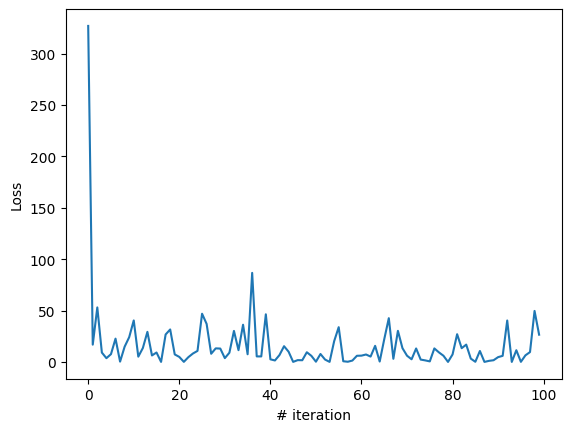

In [78]:
import matplotlib.pyplot as plt

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses

(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print ( w1 , w2 , w3 )
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()


In [80]:
tv = 19.2
radio = 35.9
newspaper = 51.3
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')


predicted sales is 8.176413319549823


In [81]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

l = compute_loss_mae(1, 0.5)
print(l)

0.5


In [85]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính giá trị dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss cho sample hiện tại
            loss = compute_loss_mse(y, y_hat)

            # Cộng dồn loss
            loss_total += loss

            # Tính gradient cho w1, w2, w3, b
            dw1_total += compute_gradient_wi(x1, y, y_hat)
            dw2_total += compute_gradient_wi(x2, y, y_hat)
            dw3_total += compute_gradient_wi(x3, y, y_hat)
            db_total += compute_gradient_b(y, y_hat)

        # Cập nhật trọng số sau khi tính gradient từ tất cả N samples
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Cộng dồn loss trung bình
        losses.append(loss_total / N)
    
    return w1, w2, w3, b, losses

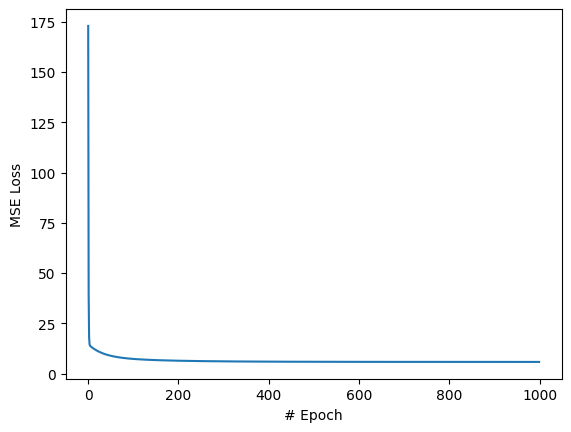

In [89]:
X , y = prepare_data (f'{root}/advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# print(losses)
plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [90]:
print("Final weights:")
print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, b = {b}")

Final weights:
w1 = 0.06710990754044266, w2 = 0.15756173831487585, w3 = 0.029619799386084403, b = 0.015537523797089711


In [67]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data  

    return X, y
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

#     return [bias, w1, w2, w3]
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

def predict(X_features, weights):
    result = sum([x * w for x, w in zip(X_features, weights)])
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [(y_hat - y) * x for x in X_features]
    return dl_dweights


def update_weight(weights, dl_dweights, lr):
    updated_weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return updated_weights


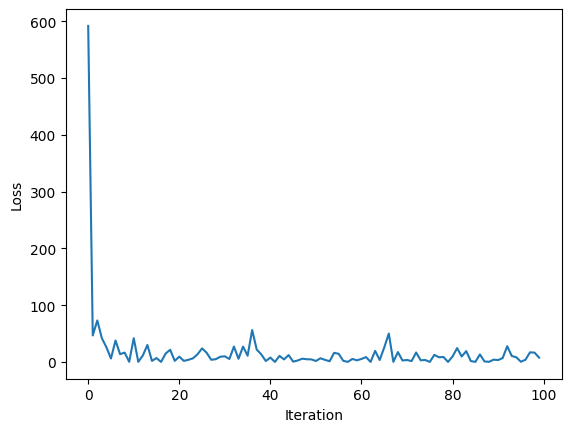

In [49]:
def implement_linear_regression(X_features, y_output, epoch_max=1000, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    
    for epoch in range(epoch_max):
#         print("Epoch:", epoch)
        
        for i in range(N):
            features_i = X_features[i]
            y = y_output[i]
            y_hat = predict(features_i, weights)
            
            loss = compute_loss(y, y_hat)
            
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            weights = update_weight(weights, dl_dweights, lr)
            
            losses.append(loss)
    
    return weights, losses

X, y = prepare_data(f'{root}/advertising.csv')

W, L = implement_linear_regression(X, y)

plt.plot(L[:100])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [50]:
X , y = prepare_data (f'{root}/advertising.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
print (L[9999])

4.102721429098558
